<a href="https://colab.research.google.com/github/Alina-Telnova/python-course/blob/master/7_data_storage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Форматы хранения данных

В этом воркбуке мы познакомимся с форматами хранения данных, популярными в NLP

## TXT

Познакомимся с режимами чтения файлов

`open('filename.txt', 'r')`

| Режим | Функция |
| ----- | ------- |
| r | только чтение |
| w | запись (удаляет содержимое) |
| a | append (не удаляет содержимое) |
| r+ | чтение и запись |
| w+ | чтение, запись, создает новый файл, если его еще нет |
| a+ | чтение, дозапись, создание файла |

In [2]:
# 'w' создает пустой файл

f = open('text.txt', 'w')

print("Мы создали пустой файл")

Мы создали пустой файл


In [3]:
# Файл доступен только для записи, прочитать его нельзя
# UnsupportedOperation: not readable

f.read()

UnsupportedOperation: not readable

In [4]:
# Но мы можем записать в файл информацию
# В выводе отображается длина записанной строки

f.write('This is a sample sentence')

25

In [5]:
# Закроем файл: иначе он будет занимать память
# Откройте файл в файловой системе Colab, чтобы увидеть результат

f.close()

In [6]:
# Повторите действия:
file = open('text.txt', 'w')# 1. откройте text.txt в режиме 'w'
file.write('Sample sentence 2')# 2. запишите в него любой текст
file.close()# 3. закройте файл
# 4 в файле только текст, который мы только что написали ('sample sentence 2'), потому что мы испольщовали режим 'w'



In [7]:
# Повторите действия с новым режимом:
file = open('text.txt', 'a')# 1. откройте text.txt в режиме 'a'
file.write('Sample sentence 3')# 2. запишите в него любой текст
file.close() # 3. закройте файл
# 4. в файле новый и старый текст, потому что использовали режим 'a'

In [8]:
# Повторите действия с новым режимом:
file = open('text.txt', 'r')# 1. откройте text.txt в режиме 'r'
text = file.read()# 2. запишем в переменную text содержимое файла с помощью функции read (см. пример в ячейках выше)
print(text)# 3. выведем на экран содержимое переменной text


Sample sentence 2Sample sentence 3


In [9]:
file_2 = open('text_2.txt', 'r')# Попробуйте создать файл с другим именем с помощью open и режима 'r'
# Ошибка, потому что режим 'r' предполагает, что файл уже существует
# r (чтение) - файл уже есть, читаем, w (запись)- старые данные удалятся, используем, когда не нужно сохранять старое содержимое файла
# a (запись) - добавляем данные к уже существующим

FileNotFoundError: [Errno 2] No such file or directory: 'text_2.txt'

In [10]:
file_2 = open('text_2.txt', 'r+')# режим позволяет одновременно читать и писать в существующий файл, иначе ошибка
file_2 = open('text_2.txt', 'w+')# открывает файл для чтения и записи, но перезаписывает весь файл (старые данные удалятся)
file_2 = open('text_2.txt', 'w+') #позволяет дописывать данные в конец файла и читать его содержимое (старые данные сохраняются)
file_2.write('Sample sentence 3')# Опишите в комментариях, когда лучше использовать 'r+', 'w+' или 'a+'
file.close()


FileNotFoundError: [Errno 2] No such file or directory: 'text_2.txt'

Метод `writelines` позволяет записывать списки

In [11]:
# Обратите внимание на использование \ - это escape symbol, или экранирование
# Мы используем экранирование для снятия неоднозначности
# В программировании тоже есть омонимия!
# Например, когда служебный символ '' или \n совпадает с информацией в тексте
# Бэкслеш указывает на то, что символ не является служебным, это часть текста

sample_list = [
    'This another sentence.',
    'This is one more sentence.',
    'Wow, here\'s one more sentence!'
]

In [12]:
# Откройте новый файл в режиме 'w+'
# С помощью метода write попробуйте записать список в файл
# Что произошло?

file_3 = open('text_3.txt', 'w+')
file_3.write(sample_list) # ошибка, можем записывать строки, не списки

TypeError: write() argument must be str, not list

In [13]:
# Замените write на writelines, чтобы записать список
# Закройте файл
# Что вы заметили?

file_3 = open('text_3.txt', 'w+')
file_3.writelines(sample_list)
file_3.close()

In [14]:
# Измените ваш код с writelines так,
# чтобы получилась структура, как на скриншоте ниже

file_3 = open('text_3.txt', 'a+')
file_3.writelines(f"{line}\n" for line in sample_list)
file_3.close()

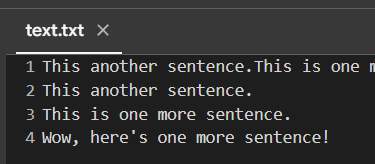

In [15]:
# Откройте ваш файл и выведите на экран результат
# Используйте метод readlines

file_3 = open('text_3.txt', 'r')
file_content = file_3.readlines()
file_3.close()
print(file_content)

["This another sentence.This is one more sentence.Wow, here's one more sentence!This another sentence.\n", 'This is one more sentence.\n', "Wow, here's one more sentence!\n"]


**`with` vs `open`+`close`**

`with` позволяет работать с файлами, не закрывая их

Обработка происходит внутри конструкции `with` (как внутри цикла `for`), вне которой файл не существует

**Когда использовать `open` и `close`?**

При работе с большими данными, когда требуется построчная обработка.

**Когда использовать `with`?**

У нас небольшой файл, который нужен нам целиком.

In [16]:
# Загрузим список стоп-слов для английского из GitHub
# Сохраним список в stopwords.txt

!wget https://gist.githubusercontent.com/sebleier/554280/raw/7e0e4a1ce04c2bb7bd41089c9821dbcf6d0c786c/NLTK\'s%2520list%2520of%2520english%2520stopwords -O stopwords.txt

--2024-12-13 14:30:33--  https://gist.githubusercontent.com/sebleier/554280/raw/7e0e4a1ce04c2bb7bd41089c9821dbcf6d0c786c/NLTK's%2520list%2520of%2520english%2520stopwords
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 622 [text/plain]
Saving to: ‘stopwords.txt’

stopwords.txt       100%[===================>]     622  --.-KB/s    in 0s      

2024-12-13 14:30:34 (34.6 MB/s) - ‘stopwords.txt’ saved [622/622]



In [17]:
# Допустим, нам нужно посчитать количество стоп-слов в списке

stopwords = open('stopwords.txt', 'r') # открываем файл

count = 0 # создаем счетчик

while True: # цикл While

    count += 1 # считаем порядковый номер слова

    line = stopwords.readline() # выводим одну строку с readline (а не readlines - она выведет все)

    if not line: # цикл заканчивается там, где заканчиваются строки
        break

    print(f"Word number {count}: {line.strip()}") # выводим номер слова и само слово

stopwords.close() # закрываем файл

Word number 1: i
Word number 2: me
Word number 3: my
Word number 4: myself
Word number 5: we
Word number 6: our
Word number 7: ours
Word number 8: ourselves
Word number 9: you
Word number 10: your
Word number 11: yours
Word number 12: yourself
Word number 13: yourselves
Word number 14: he
Word number 15: him
Word number 16: his
Word number 17: himself
Word number 18: she
Word number 19: her
Word number 20: hers
Word number 21: herself
Word number 22: it
Word number 23: its
Word number 24: itself
Word number 25: they
Word number 26: them
Word number 27: their
Word number 28: theirs
Word number 29: themselves
Word number 30: what
Word number 31: which
Word number 32: who
Word number 33: whom
Word number 34: this
Word number 35: that
Word number 36: these
Word number 37: those
Word number 38: am
Word number 39: is
Word number 40: are
Word number 41: was
Word number 42: were
Word number 43: be
Word number 44: been
Word number 45: being
Word number 46: have
Word number 47: has
Word number 4

**Рефлексия**: для каких задач подойдет такой формат обработки?

**Подсказка**: недавно я выгружала википедию для создания нового датасета..

Напишите ответ здесь: необходимо обрабатывать файл построчно. Также можно использовать в удалении стоп слов,



In [18]:
# Стоп-слова обычно нужны нам целиком, поэтому на практике мы предпочитаем with

with open('stopwords.txt', 'r') as f:
  stopwords = [line.strip() for line in f.readlines()]

stopwords

# Измените этот код, чтобы ушли лишние \n

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 '

In [19]:
!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/extracurricular/corpus.json

--2024-12-13 14:30:52--  https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/extracurricular/corpus.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 263190 (257K) [text/plain]
Saving to: ‘corpus.json’

corpus.json         100%[===================>] 257.02K  1.64MB/s    in 0.2s    

2024-12-13 14:30:54 (1.64 MB/s) - ‘corpus.json’ saved [263190/263190]



## CSV

При работе с табличными данными мы предпочитаем использовать библиотеку `pandas`

Начало работы: импорт модуля `import pandas as pd`

Почему pd? По договоренности!

Это не влияет на работу модуля, но принято загружать библиотеку именно так, но именно с таким сокращением pd вы встретитесь в любой части официальной документации Pandas.

In [20]:
import pandas as pd

Табличные данные удобно хранить в формате `csv` (comma-separated values)

Для чтения таких файлов есть функция `read_csv`

Знаете ли вы преимущества `csv` перед другими форматами?
Напишите здесь: поддерживается большинством языков программирования, легко читается

In [21]:
# Загрузим датасет про Титаник

!wget https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

--2024-12-13 14:34:10--  https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  58.89K  --.-KB/s    in 0.06s   

2024-12-13 14:34:10 (1.03 MB/s) - ‘titanic.csv’ saved [60302/60302]



In [22]:
# Читаем датасет
titanic = pd.read_csv("titanic.csv")

# Выводим первые 3 строки
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [23]:
# Загрузите любой csv и откройте его с помощью pd.read_csv
# Далее мы разберем работу с pandas более подробно
# Ознакомьтесь с возможностями, которые предоставляет вам Colab с Pandas:
# рекомендованные графики и разные форматы отображения таблиц;
# создайте визуал для своих данных по шаблону, сгенерированному Colab

new_csv = pd.read_csv('Electric_Vehicle_Population_Data (1).csv')
new_csv.head(3)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA5L,King,Seattle,WA,98133.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,0,46.0,249903111,POINT (-122.35029 47.71871),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,5UX43EU08R,King,Seattle,WA,98125.0,2024,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,39,0,46.0,264762606,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
2,5UX43EU06R,King,Seattle,WA,98102.0,2024,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,39,0,43.0,275506031,POINT (-122.32427 47.63433),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10


from matplotlib import pyplot as plt
_df_0['Postal Code'].plot(kind='hist', bins=20, title='Postal Code')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Model Year'].plot(kind='hist', bins=20, title='Model Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Electric Range'].plot(kind='hist', bins=20, title='Electric Range')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Legislative District'].plot(kind='hist', bins=20, title='Legislative District')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('VIN (1-10)').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Make').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('Electric Vehicle Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Postal Code', y='Model Year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Model Year', y='Electric Range', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='Electric Range', y='Legislative District', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='Legislative District', y='DOL Vehicle ID', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Model Year']
  ys = series['Postal Code']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('Model Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('VIN (1-10)')):
  _plot_series(series, series_name, i)
  fig.legend(title='VIN (1-10)', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Model Year')
_ = plt.ylabel('Postal Code')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Model Year']
  ys = series['Postal Code']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('Model Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Make')):
  _plot_series(series, series_name, i)
  fig.legend(title='Make', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Model Year')
_ = plt.ylabel('Postal Code')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Model Year']
  ys = series['Postal Code']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('Model Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Model Year')
_ = plt.ylabel('Postal Code')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Model Year']
  ys = series['Postal Code']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('Model Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Electric Vehicle Type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Electric Vehicle Type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Model Year')
_ = plt.ylabel('Postal Code')

from matplotlib import pyplot as plt
_df_16['Postal Code'].plot(kind='line', figsize=(8, 4), title='Postal Code')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Model Year'].plot(kind='line', figsize=(8, 4), title='Model Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Electric Range'].plot(kind='line', figsize=(8, 4), title='Electric Range')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['Legislative District'].plot(kind='line', figsize=(8, 4), title='Legislative District')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Make'].value_counts()
    for x_label, grp in _df_20.groupby('VIN (1-10)')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('VIN (1-10)')
_ = plt.ylabel('Make')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Model'].value_counts()
    for x_label, grp in _df_21.groupby('Make')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Make')
_ = plt.ylabel('Model')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Electric Vehicle Type'].value_counts()
    for x_label, grp in _df_22.groupby('Model')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Model')
_ = plt.ylabel('Electric Vehicle Type')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Vehicle Location'].value_counts()
    for x_label, grp in _df_23.groupby('Electric Vehicle Type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Electric Vehicle Type')
_ = plt.ylabel('Vehicle Location')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['VIN (1-10)'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='Postal Code', y='VIN (1-10)', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['Make'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='Postal Code', y='Make', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='Postal Code', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['Electric Vehicle Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='Postal Code', y='Electric Vehicle Type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## JSON

In [24]:
# Загрузим новостной корпус в json

!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/extracurricular/corpus.json

--2024-12-13 15:17:17--  https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/extracurricular/corpus.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 263190 (257K) [text/plain]
Saving to: ‘corpus.json.1’

corpus.json.1       100%[===================>] 257.02K  1.62MB/s    in 0.2s    

2024-12-13 15:17:18 (1.62 MB/s) - ‘corpus.json.1’ saved [263190/263190]



In [25]:
# Для работы с json нужна одноименная библиотека

import json

with open("corpus.json", "r", encoding="utf8") as f:
   data = json.load(f)

In [26]:
# pprint позволяет выводить такие вложенные структуры, как json, красиво

from pprint import pprint

pprint(data[0][0])

{'body': 'Причиной раздавшегося звука взрыва в Туле, напугавшего местных '
         'жителей, стал переход самолета на сверхзвуковую скорость, об этом '
         'сообщили в ГУ МЧС по Тульской области, передает РИА Новости. Ранее '
         'ряд пабликов сообщил о звуках взрыва в российском городе. Как '
         'отмечает Telegram-канал Mash, горожане услышали его около 21:42 в '
         'Пролетарском районе, а в 21:37 в районе Заречье пропал свет из-за '
         'аварии на подстанции. «Хлопки, которые слышали жители Пролетарского '
         'округа города Тулы, предположительно, явились следствием перехода '
         'самолета на сверхзвуковую скорость», — пояснили в МЧС. В ведомстве '
         'также рассказали, что электроснабжение в Зареченском районе города '
         'восстановлено, причиной стала техническая неисправность, авария '
         'ликвидирована. Ранее в единой диспетчерской службе (ЕДДС) Тулы '
         'сообщили, что в Зареченском районе почти пять тысяч человек о

In [28]:
# Работа с json аналогична работе со словарями в Python
# Попробуйте самостоятельно изучить структуру этого файла:
# выведите несколько заголовков из headline;
# выведите количество элементов в data[0]

pprint(data[0][0])# Выводим первый элемент для изучения структуры

print("\nПримеры заголовков из headline:")# Выводим несколько заголовков из ключа 'headline'
for i in range(5):  # Выведем первые 5 заголовков
    print(data[0][i]['headline'])

print("\nКоличество элементов в data[0]:", len(data[0]))# Выводим количество элементов в data[0]

{'body': 'Причиной раздавшегося звука взрыва в Туле, напугавшего местных '
         'жителей, стал переход самолета на сверхзвуковую скорость, об этом '
         'сообщили в ГУ МЧС по Тульской области, передает РИА Новости. Ранее '
         'ряд пабликов сообщил о звуках взрыва в российском городе. Как '
         'отмечает Telegram-канал Mash, горожане услышали его около 21:42 в '
         'Пролетарском районе, а в 21:37 в районе Заречье пропал свет из-за '
         'аварии на подстанции. «Хлопки, которые слышали жители Пролетарского '
         'округа города Тулы, предположительно, явились следствием перехода '
         'самолета на сверхзвуковую скорость», — пояснили в МЧС. В ведомстве '
         'также рассказали, что электроснабжение в Зареченском районе города '
         'восстановлено, причиной стала техническая неисправность, авария '
         'ликвидирована. Ранее в единой диспетчерской службе (ЕДДС) Тулы '
         'сообщили, что в Зареченском районе почти пять тысяч человек о

Скачайте еще один датасет
https://www.kaggle.com/datasets/finalepoch/medical-ner

Загрузите его в файловую систему Colab и запустите ячейки ниже, чтобы визуально изучить структуру датасета

In [29]:
with open("Corona2.json", "r", encoding="utf8") as f:
   data = json.load(f)

In [30]:
pprint(data['examples'][9])

{'annotations': [{'correct': None,
                  'end': 124,
                  'example_id': '9a0b1ede-2282-4dae-b086-638e45881bf5',
                  'human_annotations': [{'annotator_id': 1,
                                         'name': 'Ashpat123',
                                         'reason': 'exploration',
                                         'tagged_token_id': '19770812-2605-424f-9bc4-2d451becd837',
                                         'timestamp': '2020-03-18T10:17:37.752000Z'}],
                  'id': '19770812-2605-424f-9bc4-2d451becd837',
                  'model_annotations': [],
                  'start': 116,
                  'tag_id': '2340864c-0876-4ad1-8a34-600324a516d1',
                  'tag_name': 'Pathogen',
                  'value': 'Listeria'},
                 {'correct': None,
                  'end': 170,
                  'example_id': '9a0b1ede-2282-4dae-b086-638e45881bf5',
                  'human_annotations': [{'annotator_id': 1,
  

Такие форматы хорошо подходят для решения задач с элементами извлечения информации, автоматической разметки данных

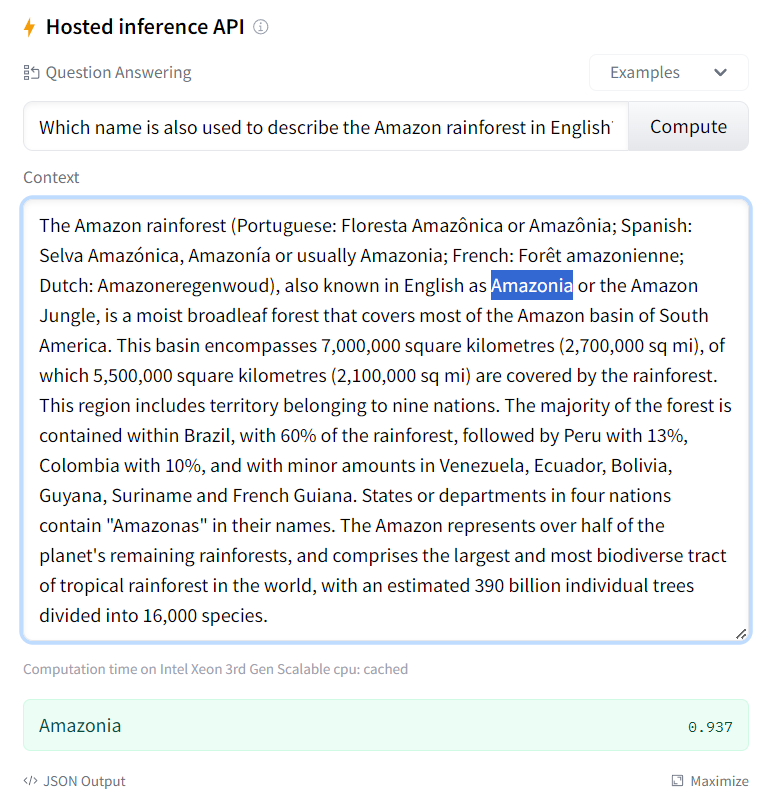

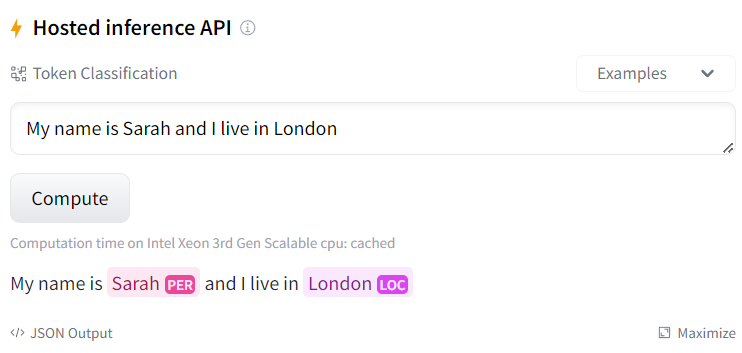

**И еще кое-что!**

Создайте свой dict() с аналогичной структурой (тематика любая!):

```
{
    "firstName": "John",
    "lastName": "Doe",
    "skills": ["C++", "ChatGPT", "Data Science"],
    "age": 45,
    "experience": [
        {
            "job": "Product Manager",
            "years": 3
        },
        {
            "job": "ML Engineer",
            "years": 4
        }
    ]
}
```

In [34]:
# Создайте файл, запишите его в переменную data

data = {
    "firstName": "Alina",
    "lastName": "Smith",
    "skills": ["Digital Art", "UI/UX Design", "Illustration"],
    "age": 23,
    "experience": [
        {
            "job": "Freelance Illustrator",
            "years": 3
        },
        {
            "job": "Digital Artist",
            "years": 1
        }
    ]
}
from pprint import pprint

pprint(data)

{'age': 23,
 'experience': [{'job': 'Freelance Illustrator', 'years': 3},
                {'job': 'Digital Artist', 'years': 1}],
 'firstName': 'Alina',
 'lastName': 'Smith',
 'skills': ['Digital Art', 'UI/UX Design', 'Illustration']}


In [33]:
# Запустите ячейку, чтобы сохранить словарь в *.json

with open("your_file.json", "w") as write_file:
    json.dump(data, write_file)